In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
%matplotlib inline

In [3]:
#Bernt's code starts here

In [4]:
# Importing necessary dataframes

birthrate_csv = "../project-one/Resources/children_per_woman_total_fertility.csv"
birthrate_df = pd.read_csv(birthrate_csv)
birthrate_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [5]:
co2_csv = "../project-one/Resources/co2_emissions_tonnes_per_person.csv"
co2_df = pd.read_csv(co2_csv)
co2_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [6]:
income_csv = "../project-one/Resources/income_per_person_gdppercapita_ppp_inflation_adjusted.csv"
income_df = pd.read_csv(income_csv)
income_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [7]:
population_csv = "../project-one/Resources/population_total.csv"
population_df = pd.read_csv(population_csv)
population_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000


In [8]:
#Bernt's code ends here

In [9]:
#Molly's code starts here

In [10]:
# reshape the income dataframe to show every Country|Year with the income for that year (using group by looked nice but didn't cut it) 
df_meltInc =income_df.melt(id_vars=['country'], var_name='year', value_name='income')
df_meltInc = df_meltInc.dropna()
df_meltInc

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
...,...,...,...
46508,Venezuela,2040,17600
46509,Vietnam,2040,12300
46510,Yemen,2040,3960
46511,Zambia,2040,6590


In [11]:
# take the reshaped income values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltInc['combined'] = df_meltInc[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltInc

,country,year,income,combined
0,Afghanistan,1800,603,Afghanistan 1800
1,Albania,1800,667,Albania 1800
2,Algeria,1800,715,Algeria 1800
3,Andorra,1800,1200,Andorra 1800
4,Angola,1800,618,Angola 1800
...,...,...,...,...
46508,Venezuela,2040,17600,Venezuela 2040
46509,Vietnam,2040,12300,Vietnam 2040
46510,Yemen,2040,3960,Yemen 2040
46511,Zambia,2040,6590,Zambia 2040


In [12]:
# reshape the income dataframe to show every Country|Year with the income for that year (using group by looked nice but didn't cut it) 
df_meltCO2 =income_df.melt(id_vars=['country'], var_name='year', value_name='co2')
df_meltCO2 = df_meltCO2.dropna()
df_meltCO2

,country,year,co2
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
...,...,...,...
46508,Venezuela,2040,17600
46509,Vietnam,2040,12300
46510,Yemen,2040,3960
46511,Zambia,2040,6590


In [13]:
# take the reshaped co2 values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltCO2['combined'] = df_meltInc[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltCO2

,country,year,co2,combined
0,Afghanistan,1800,603,Afghanistan 1800
1,Albania,1800,667,Albania 1800
2,Algeria,1800,715,Algeria 1800
3,Andorra,1800,1200,Andorra 1800
4,Angola,1800,618,Angola 1800
...,...,...,...,...
46508,Venezuela,2040,17600,Venezuela 2040
46509,Vietnam,2040,12300,Vietnam 2040
46510,Yemen,2040,3960,Yemen 2040
46511,Zambia,2040,6590,Zambia 2040


In [14]:
# merge the reshaped income and co2
merge_inc_co2_df = pd.merge(df_meltInc,df_meltCO2, on="combined", how="inner")
merge_inc_co2_df = merge_inc_co2_df.drop('country_x', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('year_x', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('country_y', axis=1)
merge_inc_co2_df = merge_inc_co2_df.drop('year_y', axis=1)
merge_inc_co2_df

,income,combined,co2
0,603,Afghanistan 1800,603
1,667,Albania 1800,667
2,715,Algeria 1800,715
3,1200,Andorra 1800,1200
4,618,Angola 1800,618
...,...,...,...
46508,17600,Venezuela 2040,17600
46509,12300,Vietnam 2040,12300
46510,3960,Yemen 2040,3960
46511,6590,Zambia 2040,6590


In [15]:
# get the log of the income so the span of the plot isn't so wide
merge_inc_co2_df['log income'] = np.log10(merge_inc_co2_df['income'])
merge_inc_co2_df.head()

,income,combined,co2,log income
0,603,Afghanistan 1800,603,2.780317
1,667,Albania 1800,667,2.824126
2,715,Algeria 1800,715,2.854306
3,1200,Andorra 1800,1200,3.079181
4,618,Angola 1800,618,2.790988


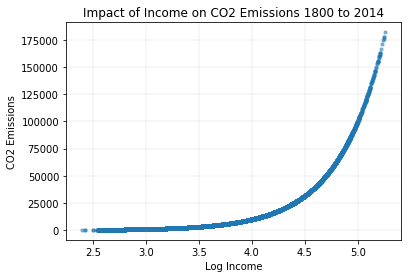

In [16]:
# plot the log of the income and the co2 to see if there was correlation
x_axis = merge_inc_co2_df["log income"]
y_axis = merge_inc_co2_df["co2"]
plt.xlabel("Log Income")
plt.ylabel("CO2 Emissions")
plt.title("Impact of Income on CO2 Emissions 1800 to 2014")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.scatter(x_axis, y_axis, alpha=0.5, s=10)
plt.savefig(os.path.join("Images", "ImpactIncomeOnCO2.png"))
plt.show()

In [17]:
print(merge_inc_co2_df['income'].mean())
print(merge_inc_co2_df['income'].median())
print(merge_inc_co2_df['income'].mode())

6392.946466579236
1640.0
0    1050
dtype: int64


In [18]:
print(merge_inc_co2_df['co2'].mean())
print(merge_inc_co2_df['co2'].median())
print(merge_inc_co2_df['co2'].mode())

6392.946466579236
1640.0
0    1050
dtype: int64


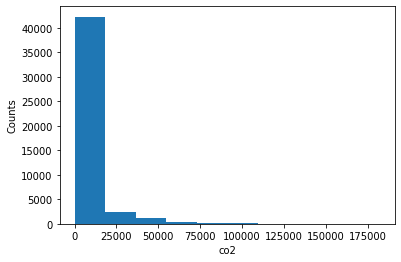

NormaltestResult(statistic=101.24516319770864, pvalue=1.0348851423813101e-22)


In [19]:
# Determine if the co2 emissions is normally distributed
plt.hist(merge_inc_co2_df['co2'])
plt.xlabel('co2')
plt.ylabel('Counts')
plt.show()
print(stats.normaltest(merge_inc_co2_df["co2"].sample(100)))

In [20]:
# reshape the population dataframe to show every Country|Year with the population for that year (using group by looked nice but didn't cut it) 
df_meltPop = population_df.melt(id_vars=['country'], var_name='year', value_name='population')
df_meltPop = df_meltPop.dropna()
df_meltPop

,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,410000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000
...,...,...,...
58690,Venezuela,2100,41600000
58691,Vietnam,2100,108000000
58692,Yemen,2100,53500000
58693,Zambia,2100,94400000


In [21]:
# take the reshaped population values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltPop['combined'] = df_meltPop[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltPop

,country,year,population,combined
0,Afghanistan,1800,3280000,Afghanistan 1800
1,Albania,1800,410000,Albania 1800
2,Algeria,1800,2500000,Algeria 1800
3,Andorra,1800,2650,Andorra 1800
4,Angola,1800,1570000,Angola 1800
...,...,...,...,...
58690,Venezuela,2100,41600000,Venezuela 2100
58691,Vietnam,2100,108000000,Vietnam 2100
58692,Yemen,2100,53500000,Yemen 2100
58693,Zambia,2100,94400000,Zambia 2100


In [22]:
# reshape the birthrate dataframe to show every Country|Year with the birthrate for that year (using group 
# by looked nice but didn't cut it) 
df_meltBirth = birthrate_df.melt(id_vars=['country'], var_name='year', value_name='birth rate')
df_meltBirth = df_meltBirth.dropna()
df_meltBirth

,country,year,birth rate
0,Afghanistan,1800,7.00
1,Albania,1800,4.60
2,Algeria,1800,6.99
3,Angola,1800,6.93
4,Antigua and Barbuda,1800,5.00
...,...,...,...
40291,Venezuela,2018,2.27
40292,Vietnam,2018,1.95
40293,Yemen,2018,3.79
40294,Zambia,2018,4.87


In [23]:
# take the reshaped birth rate values and create a new data element that combines country and year
cols = ['country', 'year']
df_meltBirth['combined'] = df_meltBirth[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_meltBirth

,country,year,birth rate,combined
0,Afghanistan,1800,7.00,Afghanistan 1800
1,Albania,1800,4.60,Albania 1800
2,Algeria,1800,6.99,Algeria 1800
3,Angola,1800,6.93,Angola 1800
4,Antigua and Barbuda,1800,5.00,Antigua and Barbuda 1800
...,...,...,...,...
40291,Venezuela,2018,2.27,Venezuela 2018
40292,Vietnam,2018,1.95,Vietnam 2018
40293,Yemen,2018,3.79,Yemen 2018
40294,Zambia,2018,4.87,Zambia 2018


In [24]:
# merge the reshaped population and birth rate
merge_pop_birth_df = pd.merge(df_meltPop,df_meltBirth, on="combined", how="inner")
merge_pop_birth_df = merge_pop_birth_df.drop('country_x', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('year_x', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('country_y', axis=1)
merge_pop_birth_df = merge_pop_birth_df.drop('year_y', axis=1)
merge_pop_birth_df

,population,combined,birth rate
0,3280000,Afghanistan 1800,7.00
1,410000,Albania 1800,4.60
2,2500000,Algeria 1800,6.99
3,1570000,Angola 1800,6.93
4,37000,Antigua and Barbuda 1800,5.00
...,...,...,...
40291,32400000,Venezuela 2018,2.27
40292,96500000,Vietnam 2018,1.95
40293,28900000,Yemen 2018,3.79
40294,17600000,Zambia 2018,4.87


In [25]:
# merge the income/co2 dataframe to the population/birth rate dataframe
merge_all_df = pd.merge(merge_pop_birth_df,merge_inc_co2_df, on="combined", how="inner")
merge_all_df

,population,combined,birth rate,income,co2,log income
0,3280000,Afghanistan 1800,7.00,603,603,2.780317
1,410000,Albania 1800,4.60,667,667,2.824126
2,2500000,Algeria 1800,6.99,715,715,2.854306
3,1570000,Angola 1800,6.93,618,618,2.790988
4,37000,Antigua and Barbuda 1800,5.00,757,757,2.879096
...,...,...,...,...,...,...
40291,32400000,Venezuela 2018,2.27,14200,14200,4.152288
40292,96500000,Vietnam 2018,1.95,6550,6550,3.816241
40293,28900000,Yemen 2018,3.79,2430,2430,3.385606
40294,17600000,Zambia 2018,4.87,3870,3870,3.587711


In [26]:
# plot the birth rate and the population to see if there was correlation
x_axis = merge_all_df["birth rate"]
y_axis = merge_all_df["population"]
plt.xlabel("Birth Rate")
plt.ylabel("Population")
plt.title("Impact of Birth Rate on Population 1800 to 2014")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.scatter(x_axis, y_axis, alpha=0.5, s=10)
plt.savefig(os.path.join("Images","ImpactBirthOnPop.png", dpi=150)
plt.show()

SyntaxError: invalid syntax (<ipython-input-26-a469f300b591>, line 10)

In [ ]:
#Molly's code ends here

In [ ]:
#Kaan's code starts here

In [ ]:
#Kaan's code ends here

In [ ]:
#Vallie's code starts here

In [28]:
# print out the birthrate df
birthrate_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [29]:
# print out the co2 dataframe
co2_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [27]:
# merge birthrate and co2 dataframes on country
co2_br_merge = pd.merge(co2_df, birthrate_df, on="country")
co2_br_merge.head()

,country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [30]:
# rename columns
co2_br_rename = co2_br_merge.rename(columns={"country": "Country",
                                             "1974_x": "1974 CO2 Emissions",
                                             "1984_x": "1984 CO2 Emissions",
                                             "1994_x": "1994 CO2 Emissions",
                                             "2004_x": "2004 CO2 Emissions",
                                             "2014_x": "2014 CO2 Emissions",
                                             "1974_y": "Birthrate_1974",
                                             "1984_y": "Birthrate_1984",
                                             "1994_y": "Birthrate_1994",
                                             "2004_y": "Birthrate_2004",
                                             "2014_y": "Birthrate_2014"})

# make df with only the columns we want to keep
co2_br_df = co2_br_rename[["Country", "1974 CO2 Emissions", "1984 CO2 Emissions", "1994 CO2 Emissions", "2004 CO2 Emissions", "2014 CO2 Emissions",
                           "Birthrate_1974", "Birthrate_1984", "Birthrate_1994", "Birthrate_2004", "Birthrate_2014"]]
co2_br_df.head()

,Country,1974 CO2 Emissions,1984 CO2 Emissions,1994 CO2 Emissions,2004 CO2 Emissions,2014 CO2 Emissions,Birthrate_1974,Birthrate_1984,Birthrate_1994,Birthrate_2004,Birthrate_2014
0,Afghanistan,0.156,0.235,0.080,0.0394,0.299,7.45,7.46,7.57,6.99,4.98
1,Albania,1.840,2.700,0.613,1.3400,1.960,4.37,3.32,2.67,1.82,1.71
2,Algeria,1.960,3.250,3.050,2.7000,3.720,7.51,6.04,3.70,2.44,2.89
3,Angola,0.652,0.487,0.281,0.9960,1.290,7.61,7.39,6.99,6.50,5.84
4,Antigua and Barbuda,6.050,2.070,3.730,4.7800,5.380,2.91,2.10,2.17,2.25,2.08


In [31]:
# create 1974 dataframe, co2 descending order
df_1974 = co2_br_df[["Country", "1974 CO2 Emissions", "Birthrate_1974"]].sort_values("1974 CO2 Emissions", ascending=False).reset_index()
df_1974 = df_1974[["Country", "1974 CO2 Emissions", "Birthrate_1974"]]

# drop rows with nan values
df_1974 = df_1974.dropna()
df_1974

,Country,1974 CO2 Emissions,Birthrate_1974
0,Qatar,68.20000,6.58
1,United Arab Emirates,66.50000,6.25
2,Brunei,52.80000,5.56
3,Luxembourg,41.00000,1.63
4,Bahamas,39.90000,3.33
...,...,...,...
164,Maldives,0.02770,7.04
165,Burundi,0.02530,7.35
166,Rwanda,0.01740,8.34
167,Bhutan,0.01080,6.69


Text(0.5, 1.0, 'CO2 Emissions v Birthrate (1974)')

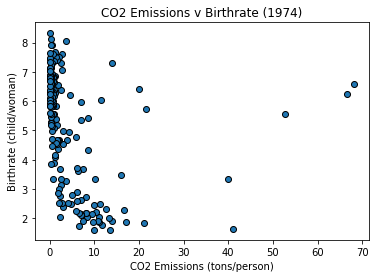

In [32]:
# run linear regression on co2 v birthrate (year 1974)

# first create scatter plot
x_values = df_1974["1974 CO2 Emissions"]
y_values = df_1974["Birthrate_1974"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (1974)")

In [33]:
# perform a linear regression on co2 v birthrate (year 1974)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.06x +5.35


The r-squared is: -0.2799233935911636


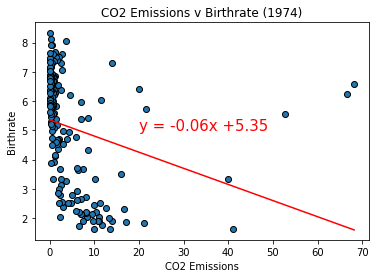

In [34]:
# create plot (co2 v birthrate, 1974)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1974)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","1974_co2_v_birthrate.png"))

# show plot
plt.show()

In [35]:
# create 1984 dataframe, co2 descending order
df_1984 = co2_br_df[["Country", "1984 CO2 Emissions", "Birthrate_1984"]].sort_values("1984 CO2 Emissions", ascending=False).reset_index()
df_1984 = df_1984[["Country", "1984 CO2 Emissions", "Birthrate_1984"]]

# drop rows with nan values
df_1984 = df_1984.dropna()
df_1984.head()

,Country,1984 CO2 Emissions,Birthrate_1984
0,Qatar,36.1,5.13
1,United Arab Emirates,35.2,5.22
2,Luxembourg,24.4,1.45
3,Bahrain,22.6,4.47
4,United States,18.8,1.79


Text(0.5, 1.0, 'CO2 Emissions v Birthrate (1984)')

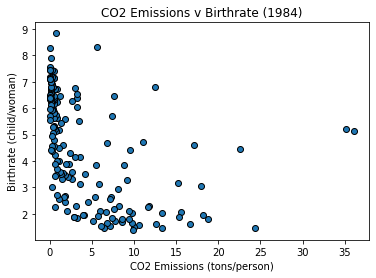

In [36]:
# run linear regression on co2 v birthrate (year 1984)

# first create scatter plot
x_values = df_1984["1984 CO2 Emissions"]
y_values = df_1984["Birthrate_1984"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (1984)")

In [37]:
# perform a linear regression on co2 v birthrate (year 1984)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.15x +5.15


The r-squared is: -0.46050704252171903


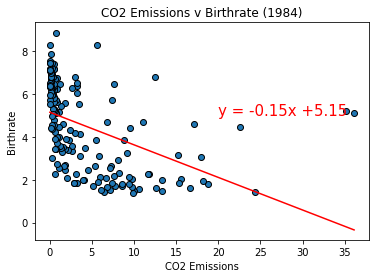

In [38]:
# create plot (co2 v birthrate, 1984)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1984)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","1984_co2_v_birthrate.png"))

# show plot
plt.show()

In [39]:
# create 1994 dataframe, co2 descending order
df_1994 = co2_br_df[["Country", "1994 CO2 Emissions", "Birthrate_1994"]].sort_values("1994 CO2 Emissions", ascending=False).reset_index()
df_1994 = df_1994[["Country", "1994 CO2 Emissions", "Birthrate_1994"]]

# drop rows with nan values
df_1994 = df_1994.dropna()
df_1994.head()

,Country,1994 CO2 Emissions,Birthrate_1994
0,Qatar,59.6,3.65
1,United Arab Emirates,31.4,3.62
2,Bahrain,26.9,3.21
3,Luxembourg,25.3,1.69
4,Kuwait,23.4,2.66


Text(0.5, 1.0, 'CO2 Emissions v Birthrate (1994)')

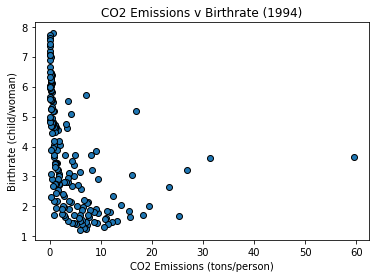

In [40]:
# run linear regression on co2 v birthrate (year 1994)

# first create scatter plot
x_values = df_1994["1994 CO2 Emissions"]
y_values = df_1994["Birthrate_1994"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (1994)")

In [41]:
# perform a linear regression on co2 v birthrate (year 1994)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.11x +4.21


The r-squared is: -0.4071706551055931


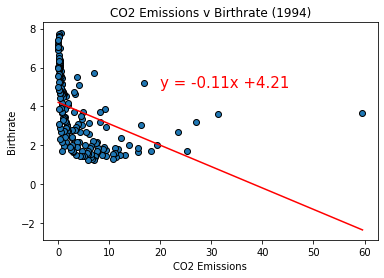

In [42]:
# create plot (co2 v birthrate, 1994)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (1994)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","1994_co2_v_birthrate.png"))

# show plot
plt.show()

In [43]:
# create 2004 dataframe, co2 descending order
df_2004 = co2_br_df[["Country", "2004 CO2 Emissions", "Birthrate_2004"]].sort_values("2004 CO2 Emissions", ascending=False).reset_index()
df_2004 = df_2004[["Country", "2004 CO2 Emissions", "Birthrate_2004"]]

# drop rows with nan values
df_2004 = df_2004.dropna()
df_2004.head()

,Country,2004 CO2 Emissions,Birthrate_2004
0,Qatar,56.6,2.71
1,Kuwait,28.8,2.55
2,United Arab Emirates,27.7,2.24
3,Trinidad and Tobago,25.9,1.76
4,Luxembourg,24.9,1.65


Text(0.5, 1.0, 'CO2 Emissions v Birthrate (2004)')

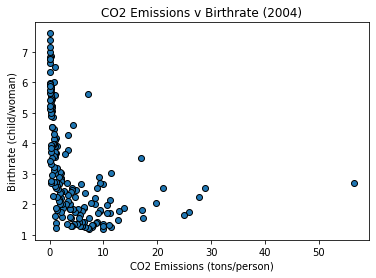

In [44]:
# run linear regression on co2 v birthrate (year 2004)

# first create scatter plot
x_values = df_2004["2004 CO2 Emissions"]
y_values = df_2004["Birthrate_2004"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (2004)")

In [45]:
# perform a linear regression on co2 v birthrate (year 2004)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.11x +3.64


The r-squared is: -0.41787255072032625


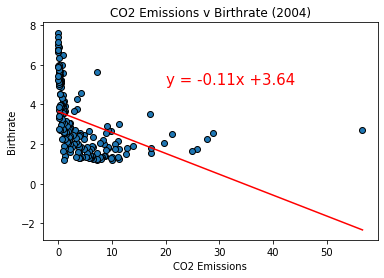

In [46]:
# create plot (co2 v birthrate, 2004)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (2004)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","2004_co2_v_birthrate.png"))

# show plot
plt.show()

In [47]:
# create 2014 dataframe, co2 descending order
df_2014 = co2_br_df[["Country", "2014 CO2 Emissions", "Birthrate_2014"]].sort_values("2014 CO2 Emissions", ascending=False).reset_index()
df_2014 = df_2014[["Country", "2014 CO2 Emissions", "Birthrate_2014"]]

# drop rows with nan values
df_2014 = df_2014.dropna()
df_2014.head()

,Country,2014 CO2 Emissions,Birthrate_2014
0,Qatar,45.4,1.95
1,Trinidad and Tobago,34.2,1.78
2,Kuwait,25.2,2.01
3,Bahrain,23.4,2.07
4,United Arab Emirates,23.3,1.78


Text(0.5, 1.0, 'CO2 Emissions v Birthrate (2014)')

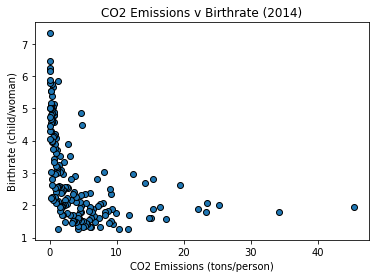

In [48]:
# run linear regression on co2 v birthrate (year 2014)

# first create scatter plot
x_values = df_2014["2014 CO2 Emissions"]
y_values = df_2014["Birthrate_2014"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (tons/person)")
plt.ylabel("Birthrate (child/woman)")
plt.title("CO2 Emissions v Birthrate (2014)")

In [49]:
# perform a linear regression on co2 v birthrate (year 2014)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.1x +3.3


The r-squared is: -0.4263862548440094


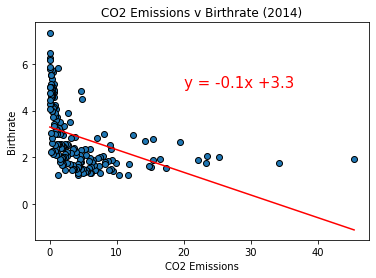

In [50]:
# create plot (co2 v birthrate, 2014)
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title("CO2 Emissions v Birthrate (2014)")

# Print r square value
print(f"The r-squared is: {rvalue}")

# save plot to images folder
plt.savefig(os.path.join("Images","2014_co2_v_birthrate.png"))

# show plot
plt.show()

**ANALYSIS:**   Based off of linear regression alone, there doesn't appear to be a statistically significant correlation between co2 and birthrate, over any of the years Kaan and I looked at. Could it be of significance that 4 of the 5 years I tested had an r-value that fell within a .058 window of each other? 1974 was the farthest away from the rest, with an r-value of -.28, classified as a weak correlation (the rest fell under a 'moderate' correlation).

In [ ]:
# running anova and independent t-tests (1974 co2 v birthrate)

# create bins to place the carbon emissions
bins = [0, 22.72, 45.46, 69]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_1974["1974 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the dataframe
df_1974["CO2 Group"] = pd.cut(df_1974["1974 CO2 Emissions"], bins, labels=group_labels)
df_1974.head()

In [ ]:
# anova (co2 v birthrate, 1974)

# create a boxplot to compare means
df_1974.boxplot("Birthrate_1974", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_1974[df_1974["CO2 Group"] == "Low-Level CO2"]["Birthrate_1974"]
group2 = df_1974[df_1974["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1974"]
group3 = df_1974[df_1974["CO2 Group"] == "High-Level CO2"]["Birthrate_1974"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 1974)
population1 = df_1974[df_1974["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1974.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 1974)
population2 = df_1974[df_1974["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1974.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 1974)
population3 = df_1974[df_1974["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1974.mean()

In [ ]:
# calculate independent t-test, low v mid (1974)
stats.ttest_ind(population1.Birthrate_1974, population2.Birthrate_1974, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (1974)
stats.ttest_ind(population1.Birthrate_1974, population3.Birthrate_1974, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (1974)
stats.ttest_ind(population2.Birthrate_1974, population3.Birthrate_1974, equal_var=False)

**ANALYSIS:** Looking at 1974, we fail to reject the null hypothesis that all three co2 level groups have the same mean birthrate. But when comparing the groups to one another, we found that there could be statistically significant data in the low v high comparison.

In [ ]:
# running anova and independent t-tests (1984 co2 v birthrate)

# create bins to place the carbon emissions
bins = [0, 12.06, 24.08, 36.2]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_1984["1984 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the DataFrame
df_1984["CO2 Group"] = pd.cut(df_1984["1984 CO2 Emissions"], bins, labels=group_labels)
df_1984.head()

In [ ]:
# anova (co2 v birthrate, 1984)

# create a boxplot to compare means
df_1984.boxplot("Birthrate_1984", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_1984[df_1984["CO2 Group"] == "Low-Level CO2"]["Birthrate_1984"]
group2 = df_1984[df_1984["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1984"]
group3 = df_1984[df_1984["CO2 Group"] == "High-Level CO2"]["Birthrate_1984"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 1984)
population1 = df_1984[df_1984["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1984.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 1984)
population2 = df_1984[df_1984["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1984.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 1984)
population3 = df_1984[df_1984["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1984.mean()

In [ ]:
#calculate independent (two sample) t-test, low v mid (1984)
stats.ttest_ind(population1.Birthrate_1984, population2.Birthrate_1984, equal_var=False)

In [ ]:
#calculate independent (two sample) t-test, low v high (1984)
stats.ttest_ind(population1.Birthrate_1984, population3.Birthrate_1984, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (1984)
stats.ttest_ind(population2.Birthrate_1984, population3.Birthrate_1984, equal_var=False)

**ANALYSIS:** The 1984 anova test has a statistically significant p-value of 0.0002, meaning we reject the null hypothesis. When comparing the three co2 groups against one another, low level versus mid level is the only comparison where we also rejected the null hypothesis. Not being well-versed in statistics, could it be worthwhile to further explore why the anova test rejected the null hypothesis but the t-test only rejected the null hypothesis on 1 out of the 3 comparisons?

In [ ]:
# running anova and independent t-tests (1994 co2 v birthrate)

# create bins to place the carbon emissions
# changed bins to pull out singleton high level co2
bins = [0, 10.47, 20.94, 31.5]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_1994["1994 CO2 Emissions"], bins, labels=group_labels)

#place the data series into a new column inside of the DataFrame
df_1994["CO2 Group"] = pd.cut(df_1994["1994 CO2 Emissions"], bins, labels=group_labels)
df_1994.head()

In [ ]:
# anova (co2 v birthrate, 1994)

# create a boxplot to compare means
df_1994.boxplot("Birthrate_1994", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_1994[df_1994["CO2 Group"] == "Low-Level CO2"]["Birthrate_1994"]
group2 = df_1994[df_1994["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1994"]
group3 = df_1994[df_1994["CO2 Group"] == "High-Level CO2"]["Birthrate_1994"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 1994)
population1 = df_1994[df_1994["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1994.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 1994)
population2 = df_1994[df_1994["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1994.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 1994)
population3 = df_1994[df_1994["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1994.mean()

In [ ]:
# calculate independent (two sample) t-test, low v mid (1994)
stats.ttest_ind(population1.Birthrate_1994, population2.Birthrate_1994, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (1994)
stats.ttest_ind(population1.Birthrate_1994, population3.Birthrate_1994, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (1994)
stats.ttest_ind(population2.Birthrate_1994, population3.Birthrate_1994, equal_var=False)

**ANALYSIS:** Similar to 1984, we reject the null hypothesis that the three co2 groups have the same birthrate means. This is a statistically significant result. And running the independent t-test, we found one p-value under .05, looking at the low versus mid co2 groups.

*Important to note:* We pulled out a singleton high-level co2 value from the 1994 data. Is it worth exploring further, maybe breaking the data into smaller subsets, or running different statistical tests?

In [ ]:
# running anova and independent t-tests (2004 co2 v birthrate)

# create bins to place the carbon emissions
# change bins in order to pull out singleton high level co2
bins = [0, 9.43, 18.87, 28.9]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_2004["2004 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the DataFrame
df_2004["CO2 Group"] = pd.cut(df_2004["2004 CO2 Emissions"], bins, labels=group_labels)
df_2004.head()

In [ ]:
# anova (co2 v birthrate, 2004)

# create a boxplot to compare means
df_2004.boxplot("Birthrate_2004", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_2004[df_2004["CO2 Group"] == "Low-Level CO2"]["Birthrate_2004"]
group2 = df_2004[df_2004["CO2 Group"] == "Mid-Level CO2"]["Birthrate_2004"]
group3 = df_2004[df_2004["CO2 Group"] == "High-Level CO2"]["Birthrate_2004"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 2004)
population1 = df_2004[df_2004["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_2004.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 2004)
population2 = df_2004[df_2004["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_2004.mean()

In [ ]:
# calculate the 'population' mean for birthrate in highest co2 group (year 2004)
population3 = df_2004[df_2004["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_2004.mean()

In [ ]:
# calculate independent (two sample) t-test, low v mid (2004)
stats.ttest_ind(population1.Birthrate_2004, population2.Birthrate_2004, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (2004)
stats.ttest_ind(population1.Birthrate_2004, population3.Birthrate_2004, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (2004)
stats.ttest_ind(population2.Birthrate_2004, population3.Birthrate_2004, equal_var=False)

**ANALYSIS:** In line with 1984 and 1994, the anova produced a rejection of the null hypothesis. And then testing the groups against one another, we also reject the null hypothesis as it pertains to the low v mid co2 group and low v high co2 group.

*Important to note:* Similar to 1994, we pulled out a singleton high-level co2 datapoint.

In [ ]:
# running anova and independent t-tests (2014 co2 v birthrate)

# create bins to place the carbon emissions
bins = [0, 15.13, 30.26, 45.5]

# create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

# slice the data and place it into bins
pd.cut(df_2014["2014 CO2 Emissions"], bins, labels=group_labels)

# place the data series into a new column inside of the DataFrame
df_2014["CO2 Group"] = pd.cut(df_2014["2014 CO2 Emissions"], bins, labels=group_labels)
df_2014.head()

In [ ]:
# anova (co2 v birthrate, 2014)

# create a boxplot to compare means
df_2014.boxplot("Birthrate_2014", by="CO2 Group", figsize=(20, 10))

In [ ]:
# extract individual groups
group1 = df_2014[df_2014["CO2 Group"] == "Low-Level CO2"]["Birthrate_2014"]
group2 = df_2014[df_2014["CO2 Group"] == "Mid-Level CO2"]["Birthrate_2014"]
group3 = df_2014[df_2014["CO2 Group"] == "High-Level CO2"]["Birthrate_2014"]

# perform the anova
stats.f_oneway(group1, group2, group3)

In [ ]:
# independent t-test

# calculate the 'population' mean for birthrate in lowest co2 group (year 2014)
population1 = df_2014[df_2014["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_2014.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 2014)
population2 = df_2014[df_2014["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_2014.mean()

In [ ]:
# calculate the 'population' mean for birthrate in mid co2 group (year 2014)
population3 = df_2014[df_2014["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_2014.mean()

In [ ]:
# calculate independent (two sample) t-test, low v mid (2014)
stats.ttest_ind(population1.Birthrate_2014, population2.Birthrate_2014, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, low v high (2014)
stats.ttest_ind(population1.Birthrate_2014, population3.Birthrate_2014, equal_var=False)

In [ ]:
# calculate independent (two sample) t-test, mid v high (2014)
stats.ttest_ind(population2.Birthrate_2014, population3.Birthrate_2014, equal_var=False)

**ANALYSIS:**  The anova test performed on the 2014 data set resulted in a failure to reject the null hypothesis. While this isn't statistically significant, we did find statistical significance when performing independent t-tests on both low v mid co2 groups and low v high co2 groups.

In [ ]:
#Vallie's code ends here